In [2]:
import pandas as pd
path='./data/Edu-Data.csv'
df=pd.read_csv(path) # 현재 ipynb 폴더 (./)의 하위폴더

#윈도우에서는 \를 사용해려면 \\ 해야 폴더경로로 인정
# (참고) \n 은 n이 원래의 문자가 아니라(이스케이프문자) 엔터의 특수임무를 띄고 있다.
# 아니면 /
path='C:\\Users\\Koreanre_14z950\\바탕화면\\python_-main\\data\\Edu-Data.csv'
df=pd.read_csv(path)   # df=pd.read_csv(path, encoding='euc-kr') 한글깨짐이 있을때는 encoding
df.head()

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,15,16,2,20,Yes,Good,Under-7,M
1,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,20,20,3,25,Yes,Good,Under-7,M
2,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,10,7,0,30,No,Bad,Above-7,L
3,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,30,25,5,35,No,Bad,Above-7,L
4,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,40,50,12,50,No,Bad,Above-7,M


In [3]:
# 온라인 LMS 자료임
# 시험성적 Class 가 상,중,하 가 있고
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 480 entries, 0 to 479
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   gender                    480 non-null    object
 1   NationalITy               480 non-null    object
 2   PlaceofBirth              480 non-null    object
 3   StageID                   480 non-null    object
 4   GradeID                   480 non-null    object
 5   SectionID                 480 non-null    object
 6   Topic                     480 non-null    object
 7   Semester                  480 non-null    object
 8   Relation                  480 non-null    object
 9   raisedhands               480 non-null    int64 
 10  VisITedResources          480 non-null    int64 
 11  AnnouncementsView         480 non-null    int64 
 12  Discussion                480 non-null    int64 
 13  ParentAnsweringSurvey     480 non-null    object
 14  ParentschoolSatisfaction  

In [4]:
# 결측치 확인,
# gpt또는 구글에'  결측치 시각화
df.isna().sum()

gender                      0
NationalITy                 0
PlaceofBirth                0
StageID                     0
GradeID                     0
SectionID                   0
Topic                       0
Semester                    0
Relation                    0
raisedhands                 0
VisITedResources            0
AnnouncementsView           0
Discussion                  0
ParentAnsweringSurvey       0
ParentschoolSatisfaction    0
StudentAbsenceDays          0
Class                       0
dtype: int64

In [5]:
## 기술통계
## mean() 산술평균  , std 표준편차, 50% 중앙값
# mean 값하고 50%값이 비슷할수록 데이터는 가운데값이 많을수 있음.
# (참고) 아래 출력값을 복사해서 gpt에 넣어서 분석하는걸 권장
df.describe()

,raisedhands,VisITedResources,AnnouncementsView,Discussion
count,480.000000,480.000000,480.000000,480.000000
mean,46.775000,54.797917,37.918750,43.283333
std,30.779223,33.080007,26.611244,27.637735
min,0.000000,0.000000,0.000000,1.000000
25%,15.750000,20.000000,14.000000,20.000000
50%,50.000000,65.000000,33.000000,39.000000
75%,75.000000,84.000000,58.000000,70.000000
max,100.000000,99.000000,98.000000,99.000000


In [7]:
tmp=df.describe()
tmp.to_csv('Edu-Data_기술통계.csv', encoding='utf-8') 

In [8]:
# 전체 데이터는 36개인데, 중복제거하니
# 12개임. (df['year'].numique)
df['gender'].unique(), df['gender'].nunique()

(array(['M', 'F'], dtype=object), 2)

In [10]:
df['NationalITy'].unique(), df['NationalITy'].nunique()

(array(['KW', 'lebanon', 'Egypt', 'SaudiArabia', 'USA', 'Jordan',
        'venzuela', 'Iran', 'Tunis', 'Morocco', 'Syria', 'Palestine',
        'Iraq', 'Lybia'], dtype=object),
 14)

In [11]:
# 년도별 갯수를 확인하니 각각3개씩 있음
df['gender'].value_counts()

gender
M    305
F    175
Name: count, dtype: int64

In [12]:
df['NationalITy'].value_counts()

NationalITy
KW             179
Jordan         172
Palestine       28
Iraq            22
lebanon         17
Tunis           12
SaudiArabia     11
Egypt            9
Syria            7
USA              6
Iran             6
Lybia            6
Morocco          4
venzuela         1
Name: count, dtype: int64

In [13]:
#  확인 
df[df['NationalITy']=='KW']

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,15,16,2,20,Yes,Good,Under-7,M
1,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,20,20,3,25,Yes,Good,Under-7,M
2,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,10,7,0,30,No,Bad,Above-7,L
3,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,30,25,5,35,No,Bad,Above-7,L
4,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,40,50,12,50,No,Bad,Above-7,M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
258,F,KW,KuwaIT,lowerlevel,G-04,A,History,S,Father,80,97,86,95,Yes,Good,Under-7,M
259,M,KW,KuwaIT,lowerlevel,G-04,A,English,S,Mum,69,34,12,17,No,Bad,Above-7,L
260,M,KW,KuwaIT,lowerlevel,G-04,A,History,S,Father,10,17,12,14,No,Bad,Above-7,L
261,M,KW,KuwaIT,lowerlevel,G-04,A,History,S,Father,61,97,82,64,Yes,Bad,Above-7,M


In [17]:
#############
## 국가별로 나누어서 csv로 저장

tmpList=df['NationalITy'].unique()
print(tmpList)
for x in tmpList:
    tmp=df[df['NationalITy']==x]
    display(tmp)

['KW' 'lebanon' 'Egypt' 'SaudiArabia' 'USA' 'Jordan' 'venzuela' 'Iran'
 'Tunis' 'Morocco' 'Syria' 'Palestine' 'Iraq' 'Lybia']


,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,15,16,2,20,Yes,Good,Under-7,M
1,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,20,20,3,25,Yes,Good,Under-7,M
2,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,10,7,0,30,No,Bad,Above-7,L
3,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,30,25,5,35,No,Bad,Above-7,L
4,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,40,50,12,50,No,Bad,Above-7,M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
258,F,KW,KuwaIT,lowerlevel,G-04,A,History,S,Father,80,97,86,95,Yes,Good,Under-7,M
259,M,KW,KuwaIT,lowerlevel,G-04,A,English,S,Mum,69,34,12,17,No,Bad,Above-7,L
260,M,KW,KuwaIT,lowerlevel,G-04,A,History,S,Father,10,17,12,14,No,Bad,Above-7,L
261,M,KW,KuwaIT,lowerlevel,G-04,A,History,S,Father,61,97,82,64,Yes,Bad,Above-7,M


,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
13,M,lebanon,lebanon,MiddleSchool,G-08,A,Math,F,Father,20,14,12,19,No,Bad,Above-7,L
79,F,lebanon,lebanon,MiddleSchool,G-07,B,Math,F,Mum,80,90,49,55,Yes,Bad,Under-7,H
123,F,lebanon,lebanon,lowerlevel,G-02,B,IT,F,Father,70,98,7,5,Yes,Good,Under-7,M
146,F,lebanon,lebanon,MiddleSchool,G-07,A,Quran,S,Mum,100,75,50,70,Yes,Good,Under-7,H
147,F,lebanon,lebanon,MiddleSchool,G-07,A,Quran,S,Father,10,79,30,30,No,Bad,Under-7,M
178,F,lebanon,lebanon,lowerlevel,G-02,B,French,S,Mum,80,42,33,13,Yes,Bad,Under-7,H
179,M,lebanon,lebanon,lowerlevel,G-02,B,French,S,Mum,40,51,20,33,No,Bad,Under-7,M
183,F,lebanon,lebanon,MiddleSchool,G-08,A,Arabic,S,Father,25,15,32,53,No,Bad,Under-7,M
184,M,lebanon,lebanon,MiddleSchool,G-08,A,Arabic,S,Mum,10,35,30,13,No,Bad,Above-7,L
185,M,lebanon,Jordan,MiddleSchool,G-08,A,Arabic,S,Mum,87,65,82,33,Yes,Good,Under-7,H


,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
37,F,Egypt,Egypt,MiddleSchool,G-07,A,IT,F,Father,45,54,26,90,Yes,Good,Under-7,M
135,F,Egypt,Egypt,MiddleSchool,G-07,A,Quran,S,Mum,70,80,95,70,Yes,Good,Under-7,H
239,M,Egypt,Egypt,MiddleSchool,G-07,B,Science,S,Mum,92,80,88,76,Yes,Good,Under-7,H
241,M,Egypt,Egypt,MiddleSchool,G-07,B,Science,S,Father,72,80,58,86,Yes,Good,Under-7,M
243,M,Egypt,KuwaIT,MiddleSchool,G-07,B,Science,S,Father,12,20,38,46,No,Bad,Above-7,M
251,M,Egypt,Egypt,lowerlevel,G-04,A,English,S,Mum,19,74,32,17,No,Good,Above-7,L
263,M,Egypt,Egypt,lowerlevel,G-04,A,Math,S,Mum,49,94,42,7,No,Bad,Above-7,M
350,M,Egypt,Egypt,lowerlevel,G-02,B,French,F,Mum,5,13,6,6,No,Good,Above-7,L
351,M,Egypt,Egypt,lowerlevel,G-02,B,French,S,Mum,7,9,11,10,No,Good,Above-7,L


,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
39,F,SaudiArabia,SaudiArabia,MiddleSchool,G-07,B,Science,F,Father,50,90,37,70,Yes,Good,Under-7,M
86,M,SaudiArabia,SaudiArabia,lowerlevel,G-02,B,IT,F,Father,70,12,40,50,Yes,Good,Under-7,H
108,M,SaudiArabia,SaudiArabia,lowerlevel,G-02,B,IT,F,Father,7,12,5,3,No,Bad,Above-7,M
150,M,SaudiArabia,SaudiArabia,HighSchool,G-11,A,Quran,S,Father,80,80,51,59,Yes,Good,Under-7,H
151,M,SaudiArabia,USA,HighSchool,G-11,A,Science,S,Father,23,63,71,89,Yes,Good,Under-7,M
152,F,SaudiArabia,USA,HighSchool,G-11,B,Science,S,Father,100,91,98,40,Yes,Bad,Under-7,H
153,M,SaudiArabia,USA,HighSchool,G-11,B,Spanish,S,Father,10,51,40,40,No,Bad,Above-7,L
154,M,SaudiArabia,USA,HighSchool,G-11,B,English,S,Father,70,50,33,41,No,Bad,Above-7,M
155,M,SaudiArabia,USA,HighSchool,G-11,B,Math,S,Father,70,58,73,91,Yes,Bad,Under-7,H
180,F,SaudiArabia,SaudiArabia,lowerlevel,G-02,B,French,S,Father,60,70,63,93,Yes,Bad,Under-7,H


,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
56,M,USA,USA,MiddleSchool,G-08,B,Math,F,Father,19,5,4,1,Yes,Good,Above-7,L
59,F,USA,USA,MiddleSchool,G-07,A,Math,F,Father,27,22,22,40,No,Good,Under-7,M
67,F,USA,USA,HighSchool,G-12,A,English,F,Mum,65,75,23,80,Yes,Good,Under-7,H
68,F,USA,USA,HighSchool,G-12,A,IT,F,Mum,70,69,35,30,Yes,Good,Under-7,H
93,M,USA,USA,lowerlevel,G-02,B,IT,F,Father,55,89,40,40,Yes,Good,Under-7,H
177,F,USA,USA,lowerlevel,G-02,B,French,S,Mum,15,52,83,11,Yes,Bad,Under-7,M


,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
60,F,Jordan,Jordan,lowerlevel,G-05,A,English,F,Mum,21,10,28,20,No,Good,Above-7,L
69,M,Jordan,Jordan,MiddleSchool,G-07,A,IT,F,Father,39,40,11,33,No,Bad,Under-7,M
70,M,Jordan,Jordan,MiddleSchool,G-07,A,IT,F,Father,22,30,10,12,Yes,Good,Above-7,L
75,M,Jordan,Jordan,MiddleSchool,G-07,A,Quran,F,Mum,50,90,29,60,Yes,Good,Under-7,M
110,F,Jordan,Jordan,lowerlevel,G-02,B,IT,F,Mum,70,88,55,40,Yes,Good,Under-7,H
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
475,F,Jordan,Jordan,MiddleSchool,G-08,A,Chemistry,S,Father,5,4,5,8,No,Bad,Above-7,L
476,F,Jordan,Jordan,MiddleSchool,G-08,A,Geology,F,Father,50,77,14,28,No,Bad,Under-7,M
477,F,Jordan,Jordan,MiddleSchool,G-08,A,Geology,S,Father,55,74,25,29,No,Bad,Under-7,M
478,F,Jordan,Jordan,MiddleSchool,G-08,A,History,F,Father,30,17,14,57,No,Bad,Above-7,L


,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
62,M,venzuela,venzuela,HighSchool,G-10,A,IT,F,Mum,80,90,70,80,Yes,Good,Under-7,H


,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
76,M,Iran,Iran,HighSchool,G-09,A,IT,F,Mum,15,70,37,44,Yes,Good,Under-7,M
126,F,Iran,Iran,lowerlevel,G-02,C,IT,F,Father,2,9,7,55,Yes,Good,Under-7,M
172,M,Iran,Iran,lowerlevel,G-02,B,French,S,Mum,20,22,53,13,No,Good,Above-7,L
175,M,Iran,Iran,lowerlevel,G-02,B,French,S,Father,10,2,13,53,No,Bad,Above-7,L
216,M,Iran,Iran,MiddleSchool,G-08,C,Spanish,S,Mum,27,41,32,61,Yes,Bad,Above-7,M
230,M,Iran,Iran,MiddleSchool,G-08,A,Spanish,S,Mum,51,42,12,29,No,Bad,Above-7,M


,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
140,M,Tunis,Tunis,MiddleSchool,G-07,A,Quran,F,Father,10,60,5,20,Yes,Bad,Above-7,L
141,M,Tunis,Tunis,MiddleSchool,G-07,A,Quran,S,Father,19,65,50,10,No,Bad,Above-7,L
142,M,Tunis,Tunis,MiddleSchool,G-07,A,Quran,S,Father,10,75,55,11,Yes,Good,Under-7,M
145,M,Tunis,SaudiArabia,MiddleSchool,G-07,A,Quran,S,Father,70,75,55,11,Yes,Bad,Under-7,M
156,F,Tunis,USA,HighSchool,G-11,B,French,S,Father,70,50,30,49,Yes,Good,Under-7,M
157,M,Tunis,Tunis,HighSchool,G-11,B,Science,S,Father,70,50,33,40,No,Good,Under-7,M
158,M,Tunis,KuwaIT,MiddleSchool,G-07,B,Science,S,Father,22,51,48,10,No,Bad,Above-7,L
167,M,Tunis,Tunis,lowerlevel,G-02,B,French,S,Mum,80,92,83,43,Yes,Good,Under-7,H
176,M,Tunis,Tunis,lowerlevel,G-02,B,French,S,Mum,60,52,23,33,Yes,Bad,Under-7,H
208,M,Tunis,Tunis,MiddleSchool,G-08,C,Spanish,S,Mum,27,41,49,14,No,Bad,Under-7,M


,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
165,F,Morocco,Morocco,lowerlevel,G-02,B,French,S,Mum,72,65,73,66,Yes,Good,Under-7,H
193,M,Morocco,Morocco,MiddleSchool,G-08,A,Arabic,S,Mum,81,75,62,53,No,Bad,Under-7,M
194,M,Morocco,Morocco,MiddleSchool,G-08,A,Arabic,S,Mum,53,75,72,23,No,Bad,Under-7,M
198,M,Morocco,Morocco,MiddleSchool,G-08,B,Arabic,S,Father,27,15,42,53,No,Bad,Above-7,L


,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
173,M,Syria,Syria,lowerlevel,G-02,B,French,S,Mum,20,52,23,33,Yes,Good,Above-7,L
231,M,Syria,Jordan,MiddleSchool,G-08,A,Spanish,S,Father,9,7,21,20,Yes,Good,Above-7,L
232,M,Syria,Syria,MiddleSchool,G-07,A,Quran,F,Father,19,72,15,50,Yes,Good,Above-7,M
324,M,Syria,Syria,lowerlevel,G-02,A,French,F,Father,24,35,18,31,No,Bad,Under-7,M
325,M,Syria,Syria,lowerlevel,G-02,A,French,S,Father,27,20,33,35,No,Bad,Under-7,M
404,F,Syria,Syria,MiddleSchool,G-07,A,Biology,F,Mum,96,95,70,70,Yes,Good,Under-7,H
405,F,Syria,Syria,MiddleSchool,G-07,A,Biology,S,Mum,80,91,87,72,Yes,Good,Under-7,H


,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
276,M,Palestine,Jordan,MiddleSchool,G-06,A,English,F,Mum,72,21,22,26,Yes,Good,Under-7,H
277,M,Palestine,Jordan,MiddleSchool,G-06,A,English,S,Mum,92,31,42,27,Yes,Good,Under-7,H
278,M,Palestine,Jordan,MiddleSchool,G-06,A,English,F,Mum,82,31,52,25,No,Good,Under-7,M
279,M,Palestine,Jordan,MiddleSchool,G-06,A,English,S,Mum,72,41,46,27,No,Good,Under-7,M
288,M,Palestine,Jordan,MiddleSchool,G-06,A,English,F,Mum,71,70,65,69,Yes,Good,Under-7,M
289,M,Palestine,Jordan,MiddleSchool,G-06,A,English,S,Mum,75,71,76,80,Yes,Good,Under-7,M
292,F,Palestine,Palestine,lowerlevel,G-04,A,Science,F,Mum,90,86,82,74,Yes,Good,Under-7,H
293,F,Palestine,Palestine,lowerlevel,G-04,A,Science,S,Mum,62,64,72,84,Yes,Good,Under-7,H
308,M,Palestine,Jordan,lowerlevel,G-04,B,Science,F,Mum,95,57,74,89,Yes,Good,Above-7,M
309,M,Palestine,Jordan,lowerlevel,G-04,B,Science,S,Mum,82,84,79,79,Yes,Good,Above-7,M


,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
280,M,Iraq,Iraq,MiddleSchool,G-06,A,English,F,Mum,74,71,56,37,No,Good,Under-7,H
281,M,Iraq,Iraq,MiddleSchool,G-06,A,English,S,Mum,74,60,56,37,No,Good,Under-7,H
294,M,Iraq,Iraq,lowerlevel,G-04,A,Science,F,Father,90,86,82,74,Yes,Good,Above-7,M
295,M,Iraq,Iraq,lowerlevel,G-04,A,Science,S,Father,62,64,72,84,Yes,Good,Above-7,M
340,F,Iraq,Iraq,lowerlevel,G-02,B,French,F,Father,16,90,15,11,No,Good,Under-7,M
341,F,Iraq,Iraq,lowerlevel,G-02,B,French,S,Father,17,80,13,10,No,Good,Under-7,M
364,M,Iraq,Iraq,lowerlevel,G-02,A,Arabic,F,Father,80,95,21,28,Yes,Good,Under-7,H
365,M,Iraq,Iraq,lowerlevel,G-02,A,Arabic,S,Father,78,70,31,29,Yes,Good,Under-7,H
382,M,Iraq,Iraq,lowerlevel,G-02,B,Arabic,F,Mum,69,82,20,28,Yes,Good,Under-7,H
383,M,Iraq,Iraq,lowerlevel,G-02,B,Arabic,S,Mum,70,83,29,33,Yes,Good,Under-7,H


,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
334,M,Lybia,Lybia,lowerlevel,G-02,A,French,F,Mum,10,8,9,3,No,Good,Above-7,L
335,M,Lybia,Lybia,lowerlevel,G-02,A,French,S,Mum,15,7,12,7,No,Good,Above-7,L
348,M,Lybia,Lybia,lowerlevel,G-02,B,French,F,Mum,20,3,9,3,No,Good,Above-7,L
349,M,Lybia,Lybia,lowerlevel,G-02,B,French,S,Mum,15,4,12,7,No,Good,Above-7,L
414,F,Lybia,Lybia,MiddleSchool,G-07,B,Biology,F,Mum,10,9,2,1,No,Good,Above-7,L
415,F,Lybia,Lybia,MiddleSchool,G-07,B,Biology,S,Mum,9,7,9,3,No,Good,Above-7,L


In [20]:
!pip --trusted-host pypi.org --trusted-host file.pythonhosted.org install seaborn

   ---------------------------------------- 0.0/294.9 kB ? eta -:--:--
   ---------------------------------------- 0.0/294.9 kB ? eta -:--:--
   ----- --------------------------------- 41.0/294.9 kB 991.0 kB/s eta 0:00:01
   ------------------------------- -------- 235.5/294.9 kB 2.9 MB/s eta 0:00:01
   ---------------------------------------- 294.9/294.9 kB 2.6 MB/s eta 0:00:00


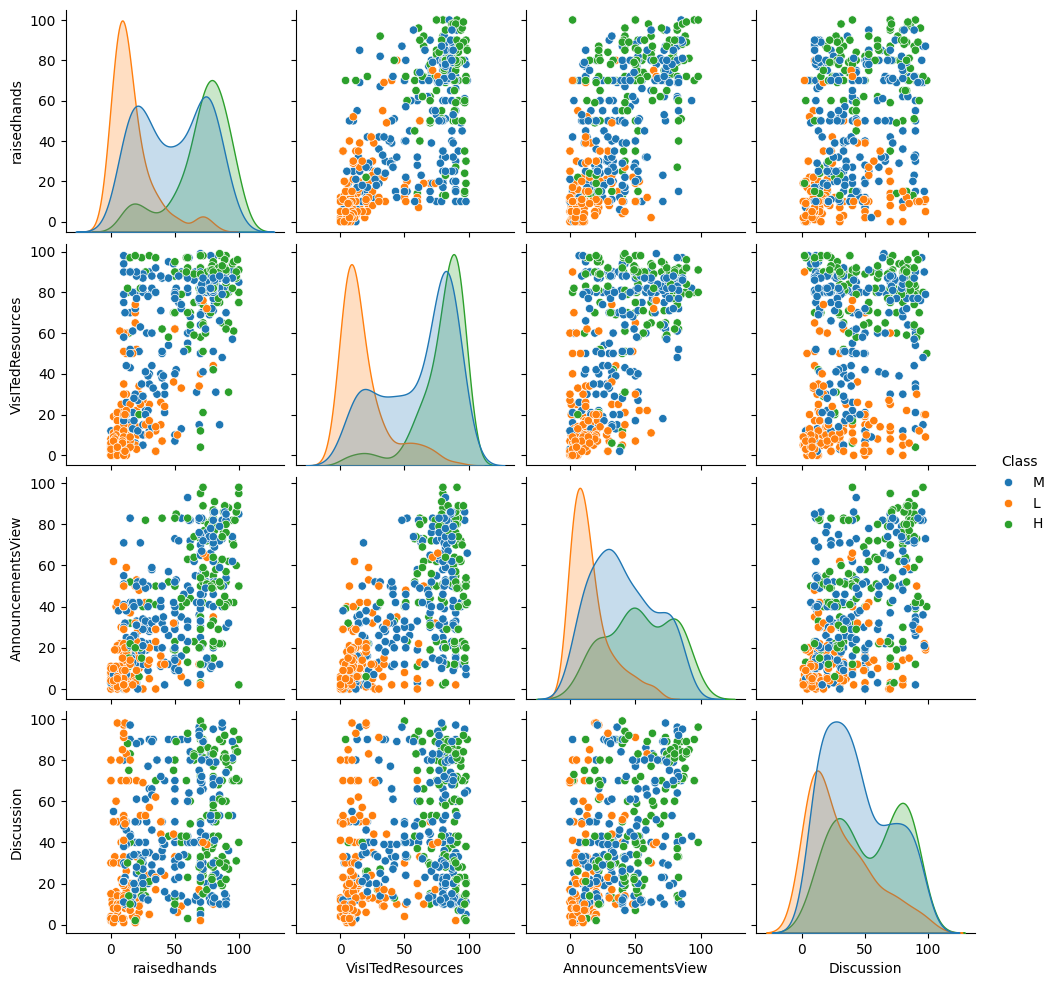

In [24]:
import seaborn as sns
sns.pairplot(df,hue='Class')  # df.info() 에서 object를 제외한 변수를 모두 산점도와 히스토그램을 제작

In [23]:
df['Class'].value_counts()

Class
M    211
H    142
L    127
Name: count, dtype: int64